In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv('TEST (1).csv')

In [2]:
import sklearn
print(sklearn.__version__)

1.0.2


In [2]:
df

,windspeed,rainfall24,rainfall6,rainfallaverage,area,yield,distance,areayieldrataio,percentageofarea,darea,yielda,fgprice,dctrice
0,0.000000,1.535972,3.032222,0.959983,2870.00,3.37,0.00000,851.632047,0.247070,709.091324,0.832626,20.79,1.113550e+07
1,0.000000,2.141071,3.942857,1.338170,491.00,4.36,0.00000,112.614679,0.244428,120.014173,1.065706,20.79,2.412279e+06
2,7.116629,5.809375,20.589580,3.630859,1330.88,4.42,385.79860,301.104072,0.312983,416.543187,1.383386,20.79,1.086828e+07
3,67.089467,3.908854,11.341670,2.443034,5767.00,4.65,26.26015,1240.215054,0.567852,3274.800267,2.640510,20.79,1.630911e+08
4,0.000000,0.805469,1.580208,0.503418,4710.00,4.14,0.00000,1137.681159,0.130472,614.521934,0.540153,20.79,6.260539e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39739,8.841748,2.292639,4.211667,1.432899,916.00,3.16,392.92250,289.873418,0.203710,186.598393,0.643724,20.79,2.265505e+06
39740,0.000000,0.030208,0.062500,0.018880,1046.00,3.07,0.00000,340.716612,0.556501,582.100434,1.708459,20.79,1.875686e+07
39741,8.575491,2.652500,5.460000,1.657812,753.00,4.52,291.88280,166.592920,0.161440,121.564092,0.729707,20.79,1.673060e+06
39742,9.387123,1.696181,3.348611,1.060113,99.00,1.93,496.10710,51.295337,0.154780,15.323183,0.298725,20.79,8.633316e+04


windspeed           0.096300
rainfall24          0.074848
rainfall6           0.100049
rainfallaverage     0.074848
area                0.855471
yield               0.332077
distance            0.061036
areayieldrataio     0.750950
percentageofarea    0.347301
yielda              0.455975
fgprice             0.006203
dctrice             0.913482
Name: darea, dtype: float64


c:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


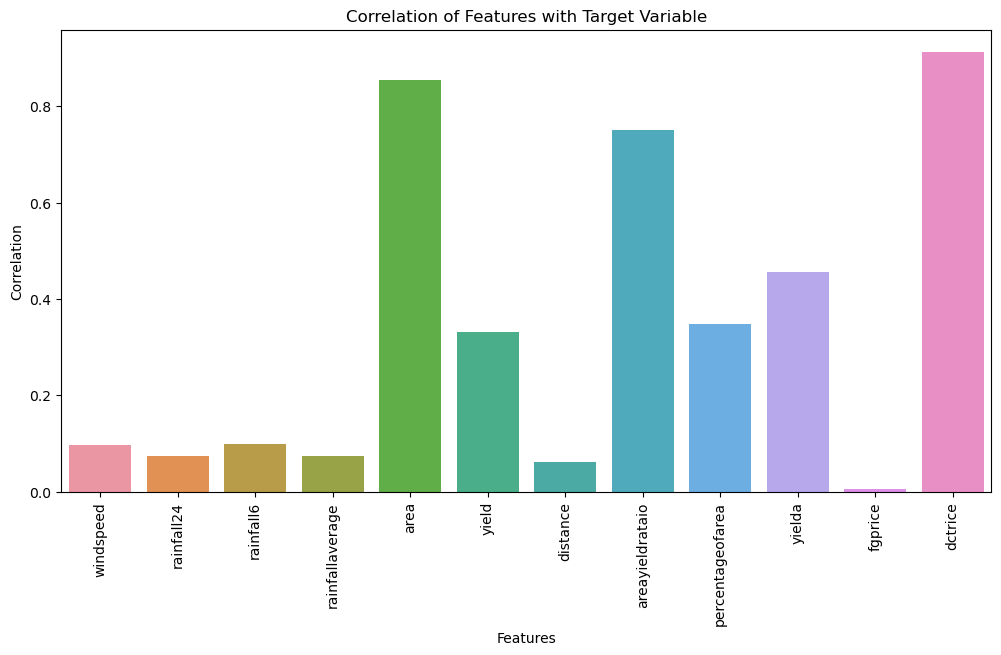

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is your target variable
correlation = df.corr()['darea'].drop('darea')

# Display the correlations
print(correlation)

# Plot the correlations
plt.figure(figsize=(12, 6))
sns.barplot(correlation.index, correlation.values)
plt.title('Correlation of Features with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

In [5]:
import pandas as pd

correlation_matrix = df.corr()

# Display the correlation matrix in tabular form
print(correlation_matrix)

                  windspeed  rainfall24  rainfall6  rainfallaverage      area  \
windspeed          1.000000    0.343700   0.385849         0.343700  0.050195   
rainfall24         0.343700    1.000000   0.901206         1.000000  0.041834   
rainfall6          0.385849    0.901206   1.000000         0.901206  0.059019   
rainfallaverage    0.343700    1.000000   0.901206         1.000000  0.041834   
area               0.050195    0.041834   0.059019         0.041834  1.000000   
yield              0.127226    0.065524   0.086768         0.065524  0.347117   
distance           0.086782    0.125570   0.099359         0.125570  0.018181   
areayieldrataio    0.024816    0.035082   0.043171         0.035082  0.919958   
percentageofarea   0.176272    0.094566   0.117061         0.094566  0.081115   
darea              0.096300    0.074848   0.100049         0.074848  0.855471   
yielda             0.187631    0.098306   0.127721         0.098306  0.267202   
fgprice            0.017187 

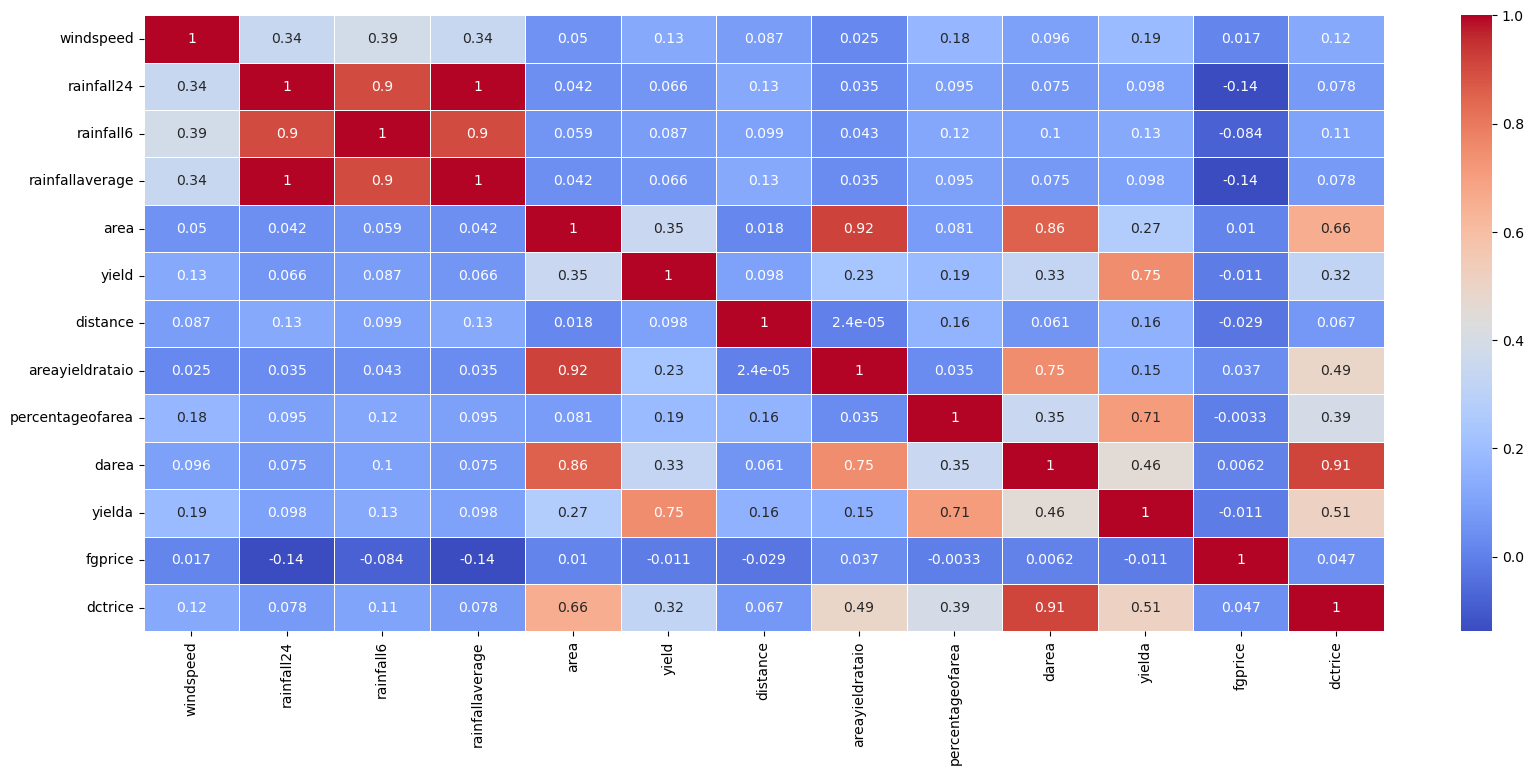

In [5]:
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [14]:
# Split the dataset into features and target variable
X = df.drop(['percentageofarea','yielda','darea','areayieldrataio','rainfallaverage','fgprice'], axis=1)
y = df.drop(['dctrice','percentageofarea','yielda','windspeed','rainfall24','rainfall6','rainfallaverage','areayieldrataio','area', 'yield', 'fgprice','distance'], axis=1)

In [16]:
X

,windspeed,rainfall24,rainfall6,area,yield,distance,dctrice
0,0.000000,1.535972,3.032222,2870.00,3.37,0.00000,1.113550e+07
1,0.000000,2.141071,3.942857,491.00,4.36,0.00000,2.412279e+06
2,7.116629,5.809375,20.589580,1330.88,4.42,385.79860,1.086828e+07
3,67.089467,3.908854,11.341670,5767.00,4.65,26.26015,1.630911e+08
4,0.000000,0.805469,1.580208,4710.00,4.14,0.00000,6.260539e+06
...,...,...,...,...,...,...,...
39739,8.841748,2.292639,4.211667,916.00,3.16,392.92250,2.265505e+06
39740,0.000000,0.030208,0.062500,1046.00,3.07,0.00000,1.875686e+07
39741,8.575491,2.652500,5.460000,753.00,4.52,291.88280,1.673060e+06
39742,9.387123,1.696181,3.348611,99.00,1.93,496.10710,8.633316e+04


In [18]:
# Remove the rows with zero values from the training set and testing set
mask = X['windspeed'] != 0

# Apply the mask to X_train
X = X[mask]

# Apply the mask to y_train
y = y[mask]

In [19]:
# Remove the rows with zero values from the training set and testing set
mask =X['dctrice'] != 0

# Apply the mask to y_train
y = y[mask]

# Apply the mask to X_train
X = X[mask]

In [21]:
y

,darea
2,416.543187
3,3274.800267
5,18.574810
6,14.184494
7,452.347780
...,...
39729,28.768917
39736,79.952276
39739,186.598393
39741,121.564092


In [22]:
X.shape, y.shape

((15401, 7), (15401, 1))

In [23]:
# Data split into a training set and a temporary set using an 80-20 split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split into a validation set and a test set using a 50-50 split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [24]:
X_val.shape, y_val.shape

((1540, 7), (1540, 1))

In [25]:
X_test.shape, y_test.shape

((1541, 7), (1541, 1))

In [26]:

X_train.shape, y_train.shape

((12320, 7), (12320, 1))

In [27]:
y_train.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   darea   12320 non-null  float64
dtypes: float64(1)
memory usage: 192.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   windspeed   12320 non-null  float64
 1   rainfall24  12320 non-null  float64
 2   rainfall6   12320 non-null  float64
 3   area        12320 non-null  float64
 4   yield       12320 non-null  float64
 5   distance    12320 non-null  float64
 6   dctrice     12320 non-null  float64
dtypes: float64(7)
memory usage: 770.0 KB


In [28]:
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce')
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce')
y_train = pd.DataFrame(y_train).apply(pd.to_numeric, errors='coerce')
y_test = pd.DataFrame(y_test).apply(pd.to_numeric, errors='coerce')

In [29]:
X_train.shape, y_train.shape


((12320, 7), (12320, 1))

In [30]:
X_train.shape, y_train.shape

((12320, 7), (12320, 1))

In [31]:
nan_rows = X_train[X_train.isna().any(axis=1)].index
X_train = X_train.drop(nan_rows)
y_train = y_train.drop(nan_rows)

print(np.where(pd.isnull(X_train)))

(array([], dtype=int64), array([], dtype=int64))


In [32]:
X_train.shape,y_train.shape

((12320, 7), (12320, 1))

In [33]:
nan_rows = X_test[X_test.isna().any(axis=1)].index
X_test = X_test.drop(nan_rows)
y_test = y_test.drop(nan_rows)

In [34]:
nan_rows = X_val[X_val.isna().any(axis=1)].index
X_val = X_val.drop(nan_rows)
y_val = y_val.drop(nan_rows)

In [35]:
X_test.shape, y_test.shape

((1541, 7), (1541, 1))

In [36]:
X_val.shape, y_val.shape

((1540, 7), (1540, 1))

In [37]:
X_test.shape, y_test.shape

((1541, 7), (1541, 1))

In [38]:

# Create a pipeline with StandardScaler and SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, RobustScaler, PowerTransformer, MaxAbsScaler


pipeline = make_pipeline(StandardScaler(), SVR(kernel='poly', C=2, degree=2, gamma='auto', coef0=2))

# Fitting the pipeline to the training set
pipeline.fit(X_train, y_train)


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr',
                 SVR(C=2, coef0=2, degree=2, gamma='auto', kernel='poly'))])

In [39]:

from sklearn.metrics import explained_variance_score


predictions = pipeline.predict(X_test)

# Evaluate the model
r2 = pipeline.score(X_test, y_test)
print(f'R-squared (Test): {r2}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (Test): {mae}')

predictionsVal = pipeline.predict(X_val)

# Evaluate the model


r2 = pipeline.score(X_val, y_val)
print(f'\nR-squared (Validation): {r2}')
maev = mean_absolute_error(y_val, predictionsVal)
print(f'Mean Absolute Error (Validation): {maev}')

# Assuming `predictions` are the predicted values from your model
explained_variance = explained_variance_score(y_test, predictions)
print(f'\nExplained Variance (Test): {explained_variance}')


explained_variance = explained_variance_score(y_val, predictionsVal)
print(f'Explained Variance (Validation): {explained_variance}')


# Calculate and print MAE in percentage points for test set
mae_percentage_test = (mae / y_test.values.mean()) * 100
print(f'\nMean Absolute Error (Test, p.p.): {mae_percentage_test}%')

# Calculate and print MAE in percentage points for test set
mae_percentage_val = (mae / y_val.values.mean()) * 100
print(f'Mean Absolute Error (Validation, p.p.): {mae_percentage_val}%')


R-squared (Test): 0.980563555876592
Mean Absolute Error (Test): 60.414200638221

R-squared (Validation): 0.9852234400408197
Mean Absolute Error (Validation): 60.25898175507082

Explained Variance (Test): 0.9807341177473133
Explained Variance (Validation): 0.9852453183445321

Mean Absolute Error (Test, p.p.): 11.348575417544334%
Mean Absolute Error (Validation, p.p.): 11.529487130768128%


In [40]:
print(['{:.2f}'.format(pred) for pred in predictionsVal])

['29.88', '16.11', '426.90', '359.91', '127.97', '226.84', '339.07', '625.06', '315.43', '153.48', '2315.60', '592.10', '63.34', '119.26', '425.92', '79.72', '13.40', '533.82', '351.33', '274.16', '13.71', '164.57', '25.44', '1142.33', '70.05', '1163.34', '284.81', '148.51', '110.63', '14.79', '80.84', '8.02', '1758.70', '652.21', '9.82', '2263.29', '3.81', '1434.54', '961.13', '-5.03', '526.91', '21.84', '248.82', '10.92', '486.16', '668.46', '70.02', '4.90', '30.10', '505.26', '35.18', '391.97', '1555.96', '152.22', '4.74', '166.63', '93.53', '60.15', '59.83', '529.59', '84.51', '260.08', '13.28', '203.86', '386.18', '110.56', '1122.63', '108.39', '842.83', '3.62', '32.48', '186.63', '832.72', '26.29', '415.41', '430.79', '988.03', '2.64', '184.23', '483.75', '45.87', '630.58', '353.67', '3572.36', '15.84', '69.55', '650.99', '94.63', '133.73', '251.73', '689.05', '6348.43', '28.61', '64.44', '52.91', '185.69', '497.88', '159.73', '452.11', '126.26', '160.68', '19.47', '169.67', '548

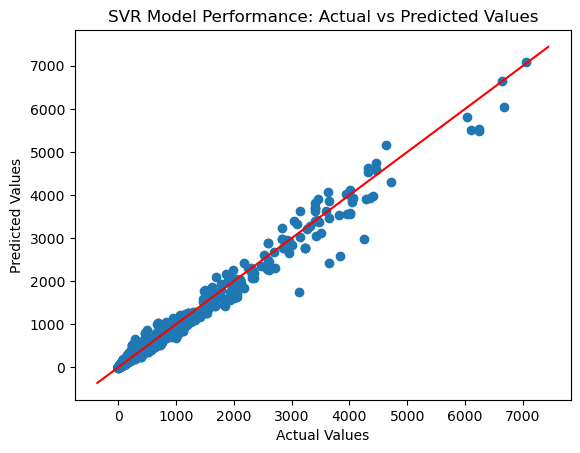

In [41]:
import matplotlib.pyplot as plt

# Make predictions
predictions = pipeline.predict(X_test)

# Create a scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Model Performance: Actual vs Predicted Values')

limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

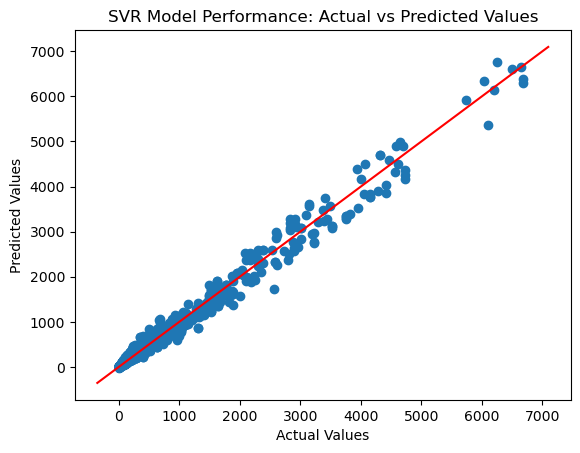

In [42]:
import numpy as np

# Make predictions
predictionsVal = pipeline.predict(X_val)

# Create a scatter plot
plt.scatter(y_val, predictionsVal)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Model Performance: Actual vs Predicted Values')

limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

In [43]:
import pandas as pd
import numpy as np

# Ensure y_test and predictions are 1-dimensional
y_test = np.ravel(y_test)
predictions = np.ravel(predictions)

# Create a DataFrame with actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': ['{:.2f}'.format(pred) for pred in predictions]})

# Display the DataFrame
print(df.head(20))

         Actual Predicted
0     30.235670     33.53
1    608.606722    559.75
2    136.180042    150.11
3    187.278489    264.21
4    105.450131    136.63
5    152.033502    244.90
6    238.698252    204.14
7      5.075225      7.38
8   1594.434973   1624.89
9     52.380358    101.05
10    35.425384     36.06
11    20.438753     28.28
12  1328.567244   1109.81
13   110.065888    107.68
14  1069.453424   1052.85
15   334.057817    358.46
16   260.436496    229.84
17   300.465465    355.13
18  1586.184727   1568.28
19   707.514481    675.33


In [44]:

from joblib import dump

dump(pipeline, 'SVR-DAREA.joblib')


['SVR-DAREA.joblib']